MSE: 28.56810
PSNR: 33.57 dB
SSIM: 0.89053
NCC: 0.96871


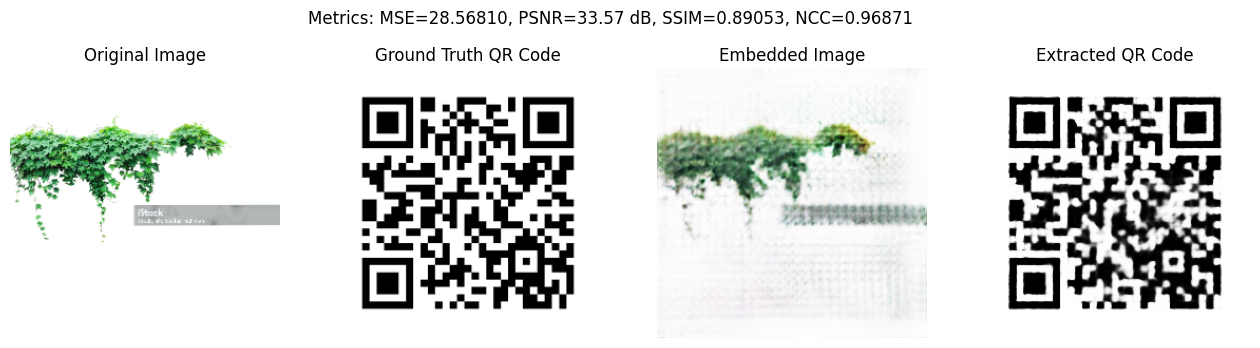

In [1]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = "0"

import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import pandas as pd

def mse(imageA, imageB):
    """Compute Mean Squared Error (MSE) between two images."""
    return np.mean((imageA - imageB) ** 2)

def psnr(imageA, imageB):
    """Compute Peak Signal-to-Noise Ratio (PSNR)."""
    mse_value = mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')  # Perfect match
    return 10 * np.log10(255.0**2 / mse_value)  # Assuming pixel range [0,255]

def normalized_cross_correlation(imageA, imageB):
    """Compute Normalized Cross-Correlation (NCC)."""
    imageA = imageA.flatten()
    imageB = imageB.flatten()
    return np.corrcoef(imageA, imageB)[0, 1]

# Load the pickled DataFrame that contains the four columns:
# "original_image", "QR_code", "embedded_image", "extracted_QR"
df_filepath = "dataset/updated_encoded_images.pkl"  # Update path if necessary
df = pd.read_pickle(df_filepath)

# Randomly select one row from the DataFrame
sample_row = df.sample(n=1).iloc[0]

# Retrieve the images from the selected row
# (Assuming arrays are stored in the DataFrame)
original_img = sample_row["original_image"]       # Expected shape: (256,256,3)
qr_code_gt = sample_row["QR_code"]                  # Expected shape: (256,256) or (256,256,1)
embedded_img = sample_row["embedded_image"]         # Expected shape: (256,256,3)
extracted_qr = sample_row["extracted_output"]            # Expected shape: (256,256) or (256,256,1)

# If QR images have an extra channel, squeeze them to 2D for metric computations and display
if len(qr_code_gt.shape) == 3:
    qr_code_gt = np.squeeze(qr_code_gt, axis=-1)
if len(extracted_qr.shape) == 3:
    extracted_qr = np.squeeze(extracted_qr, axis=-1)

# Convert images to uint8 (assuming they are in [0,1] range) for metric computation
original_img_disp = (original_img * 255).astype(np.uint8)
embedded_img_disp = (embedded_img * 255).astype(np.uint8)
qr_code_disp = (qr_code_gt * 255).astype(np.uint8)
extracted_qr_disp = (extracted_qr * 255).astype(np.uint8)

# Compute metrics between the ground truth QR code and the extracted QR code
mse_val = mse(qr_code_disp, extracted_qr_disp)
psnr_val = psnr(qr_code_disp, extracted_qr_disp)
ssim_val = ssim(qr_code_disp, extracted_qr_disp, data_range=255)
ncc_val = normalized_cross_correlation(qr_code_disp, extracted_qr_disp)

print(f"MSE: {mse_val:.5f}")
print(f"PSNR: {psnr_val:.2f} dB")
print(f"SSIM: {ssim_val:.5f}")
print(f"NCC: {ncc_val:.5f}")

# Plot the images
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(original_img_disp)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(qr_code_disp, cmap="gray")
plt.title("Ground Truth QR Code")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(embedded_img_disp)
plt.title("Embedded Image")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(extracted_qr_disp, cmap="gray")
plt.title("Extracted QR Code")
plt.axis("off")

plt.suptitle(f"Metrics: MSE={mse_val:.5f}, PSNR={psnr_val:.2f} dB, SSIM={ssim_val:.5f}, NCC={ncc_val:.5f}")
plt.show()